In [1]:
import numpy as np
import pandas as pd
from scipy import pi
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy import hamming
%matplotlib inline

In [2]:
N = 32
sampling_rate = 10
data = pd.read_csv("../data_files/cup.txt")

FileNotFoundError: File b'../data_files/cup.txt' does not exist

In [183]:
X = fftpack.fft(data.B[:32])
freqs = fftpack.fftfreq(N, 1/sampling_rate)

In [1]:
fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))

NameError: name 'plt' is not defined

<Container object of 3 artists>

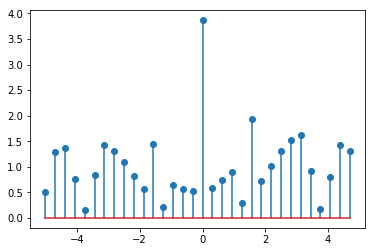

In [186]:
window = hamming(32)
fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X)*window)

<Container object of 3 artists>

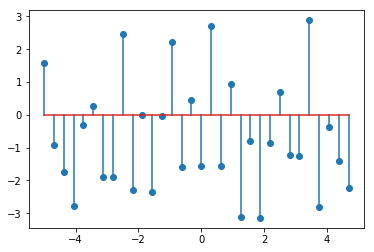

In [187]:
fig, ax = plt.subplots()

ax.stem(freqs, [np.arctan2(x.real, x.imag) for x in X])

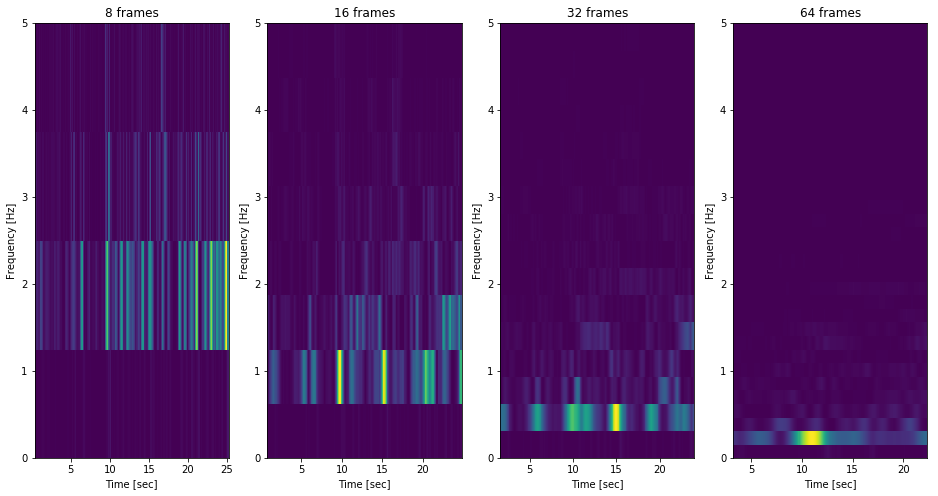

In [201]:
from scipy import signal
f, t, Sxx = signal.spectrogram(data.B, fs=10, nperseg=8, noverlap=7, mode='psd')

plt.figure(num=1, figsize=(16, 8))
plt.subplot(141)
plt.pcolormesh(t, f, Sxx)
plt.title("8 frames")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

f, t, Sxx = signal.spectrogram(data.B, fs=10, nperseg=16, noverlap=15, mode='psd')
plt.subplot(142)
plt.pcolormesh(t, f, Sxx)
plt.title("16 frames")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

f, t, Sxx = signal.spectrogram(data.B, fs=10, nperseg=32, noverlap=31, mode='psd')
plt.subplot(143)
plt.pcolormesh(t, f, Sxx)
plt.title("32 frames")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

f, t, Sxx = signal.spectrogram(data.B, fs=10, nperseg=64, noverlap=63, mode='psd')
plt.subplot(144)
plt.pcolormesh(t, f, Sxx)
plt.title("64 frames")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.savefig("cup.pdf", quality=100)
plt.show()

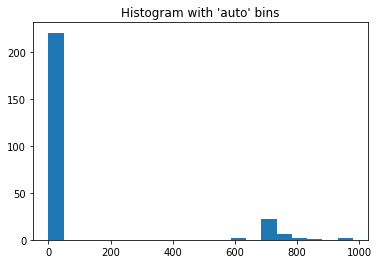

In [104]:
plt.hist(data.A, 20)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()